In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

In [2]:
real= pd.read_csv('/Users/gargi/Desktop/DSC_SB/adanced_ml/True.csv')

In [3]:
fake = pd.read_csv('/Users/gargi/Desktop/DSC_SB/adanced_ml/Fake.csv')

In [4]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
real.shape

(21417, 4)

In [6]:
fake.shape

(23481, 4)

In [7]:
real['label'] = 1
fake['label'] = 0

In [8]:
data = pd.concat([real, fake])

In [9]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
data.shape

(44898, 5)

/Users/gargi/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

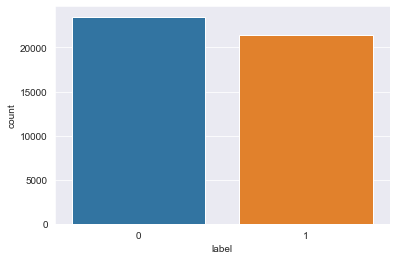

In [11]:
sns.set_style("darkgrid")
sns.countplot(data['label'])

#### We can conclude from the plot that the data is balanced. This is an important step because there are lot of real world datasets that are imbalanced. Let us check for null values in the data.


## Finding null data

In [12]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

#### We have no null values!

In [13]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

/Users/gargi/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='subject', ylabel='count'>

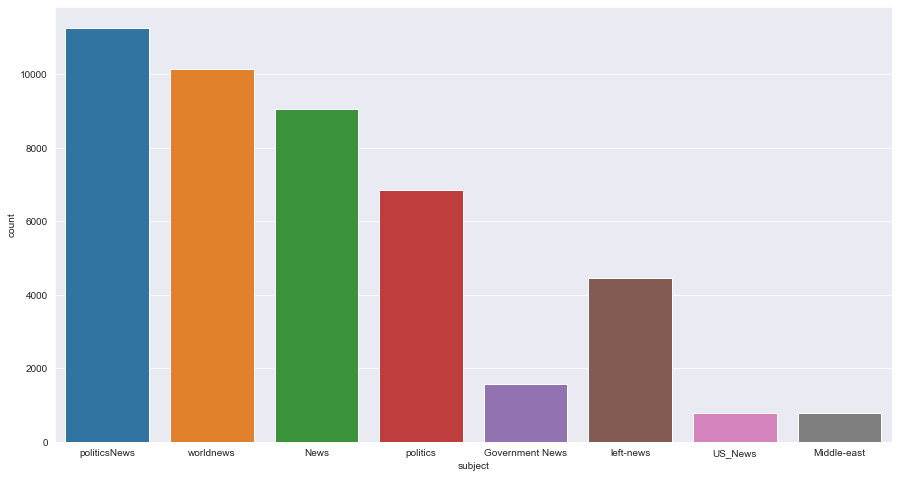

In [25]:
plt.figure(figsize = (15,8))
sns.countplot(data.subject)

[Text(0, 0, '0'), Text(1, 0, '1')]

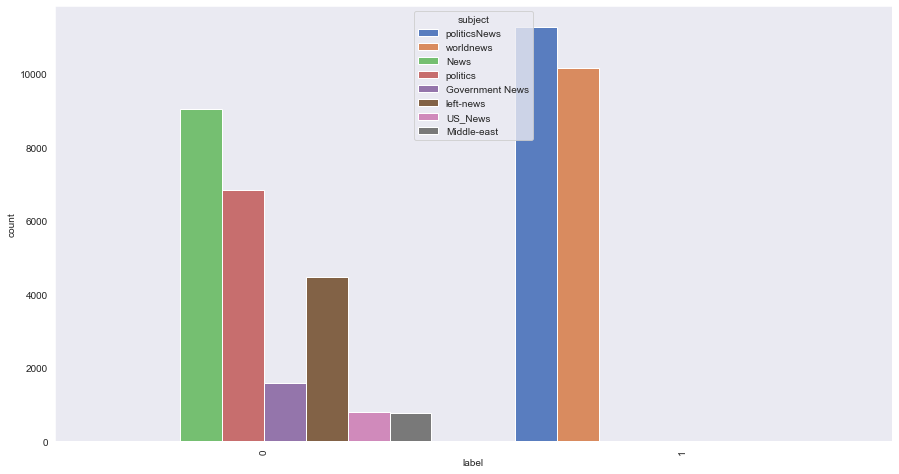

In [26]:
plt.figure(figsize = (15, 8))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

### It is clear from the plot that all our real news belongs to 2 subjects

In [ ]:
data['text'] = data['title'] + " " + data['text']
data = data.drop(['title', 'subject', 'date'], axis=1)


In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 0].text)) 

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 1].text)) 
  
# plot the WordCloud image for genuine news data                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Classification

In [20]:
import sklearn
from sklearn.model_selection import train_test_split


In [21]:
x_train, x_test, y_train, y_test = train_test_split(data['text'],data['label'],test_size=0.2, random_state = 1)


### MultiNomial Naive Bayes


In [16]:
%pip install mlxtend

     |████████████████████████████████| 1.4MB 2.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


accuracy:   93.842


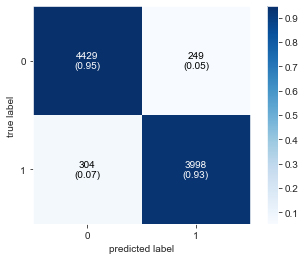

In [22]:
#Multinomial NB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   99.521


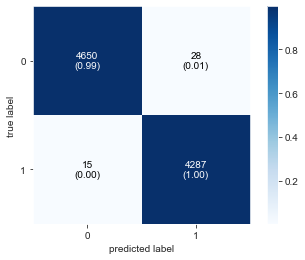

In [23]:

#SVM
from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


accuracy:   99.543


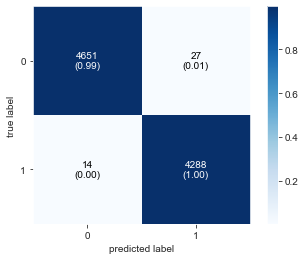

In [24]:

#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
